In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import os
import json
import requests
import unicodedata

from bs4 import BeautifulSoup

from pprint import pprint
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, recall_score

from time import strftime

from sklearn.model_selection import train_test_split

from wordcloud import WordCloud

from env import get_connection
import acquire as ac
from acquire import scrape_github_data
import prepare as prep

seed = 42

In [2]:
def get_tfidf(languagename_words):

        # obtain TF-IDF score
    tfidf = TfidfVectorizer()

        # fit-transform
    bag_o_words = tfidf.fit_transform(languagename_words)

        # create df of transformed & fit data : TF-IDF score
    word_df = pd.DataFrame(bag_o_words.todense(),
                        columns = tfidf.get_feature_names_out())

    words_series = pd.Series(dict(zip(
                            tfidf.get_feature_names_out(), 
                            tfidf.idf_)))
    print()
    print('- - - - - - - - - - - - - - -')
    print('Key / value pairs of words and frequencies :')
    print(words_series)
    print()
    print('- - - - - - - - - - - - - - -')
    print('Dataframe of TF-IDF scores :')
    return word_df
    print()
    print('- - - - - - - - - - - - - - -')

In [3]:
def split_train_test(df):
    
    seed = 42
    train, val_test = train_test_split(df, train_size=.5, random_state=seed)
    validate, test = train_test_split(val_test, train_size=.6, random_state=seed)
    
    return train, validate, test

In [36]:
def xy_train(train, validate, test, target):
    '''
    This function will separate each of my datasets (train, validate, and test) 
    and split them further into my x and y sets for modeling.
    '''
    
    seed = 42
    
    X_train = train.drop(columns=target)
    y_train = train[target]

    X_validate = validate.drop(columns=target)
    y_validate = validate[target]

    X_test = test.drop(columns=target)
    y_test = test[target]
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [19]:
def word_cloud(words):
    
    series = WordCloud(background_color='white').generate(' '.join(words))
    plt.figure(figsize=(12, 8))
    plt.imshow(series)
    plt.axis('off')
    plt.show()

In [20]:
def prep_article_data(df, column, exclude_words=[]):

    df['clean'] = df[column].apply(prep.basic_clean)\
                            .apply(prep.tokenize)\
                            .apply(prep.remove_stopwords,
                                  exclude_words=exclude_words)
    
    df['stemmed'] = df['clean'].apply(prep.stem)
    
    df['lemmatized'] = df['clean'].apply(prep.lemmatize)
    
    return df[['repo', column,'clean', 'stemmed', 'lemmatized']]

In [7]:
#url = 'https://github.com/search?o=desc&p=3&q=shoes&s=stars&type=Repositories'

#response = requests.get(url)
#response

In [10]:
#response.text

In [11]:
#soup = BeautifulSoup(response.content, 'html.parser')

In [12]:
#soup.find_all('a')

In [13]:
#soup.find_all('a')

In [14]:
#pageCount = 15
#urlsList = []

#base = 'https://github.com/search?o=desc&p={}&q=shoes&s=stars&type=Repositories' #curly braces let you format

#for x in range(pageCount)[0:]:
#    urlsList.append(base.format(x))

In [15]:
#repo_list = ac.get_repo_links(topic='shoes', number_of_pages=15)

In [16]:
#len(repo_list)

In [11]:
# %load repos.py
#REPOS = ['/justinmk/vim-sneak', '/google-research-datasets/Objectron', '/shoes/shoes4', '/shoes/shoes-deprecated', '/filamentgroup/shoestring', '/devefy/Flutter-Adidas-Shoes-Ecommerce-App-UI', '/druv5319/Sneaks-API', '/tylerburleigh/nike-buy-bot', '/afgprogrammer/Flutter-Shoes-Shop-App', '/matadon/mizuno', '/ashbb/green_shoes', '/hua1995116/react-shopping', '/shoes/shoes3', '/Joxroxagain/adidas-bot', '/Julian/vim-textobj-variable-segment', '/mustfaibra/RoFFu', '/nelsonsilva/yUMLmeRails', '/kevin-powell/shoes', '/BenjaminMahmic/shoes_shop', '/georgewalton/Sandals', '/bdkay/nike-bot', '/dzt/supreme-api', '/micah5/sneaker-generator', '/alastairparagas/nikeshoes-bot', '/thunt01/SneakerBot-App', '/petejkim/socks', '/WebAR-rocks/WebAR.rocks.hand', '/kriziu/shoes-ecommerce', '/rashidwassan/flutter-ecommerce-app-ui', '/rprokap/pset-9', '/seuliufeng/DeepSBIR', '/cmer/shoestrap', '/reverentgeek/public-speaking', '/yuqian1023/Deep_SBIR_tf', '/sopheamen007/app.mobile.shoes-online-app-ui', '/yousefissa/Shoe-Raffle-Scripts', '/iw-an/shoepalace', '/chang-chih-yao/Shoes-Try-On-in-AR', '/brandontruggles/Selenium-Shoe-Bot-NakedCPH', '/trananhtuat/nike-shoes-landing-page', '/sloria/ped', '/shoes/shoesrb.com', '/rileyjshaw/tappy', '/finallyfunctional/vr-shoes-3d-models', '/onyxblade/ShenmeGUI', '/aslansky/react-stack-playground', '/ashbb/shoes_tutorial_html', '/iamyuu/shoes-commerce', '/chriseidhof/shoes-swift', '/luizbatanero/gostack-rocketshoes-react', '/mohamedebrahim96/Quiz-App', '/MarkipTheMudkip/in-class-project-2', '/rwema3/ShoesShop-Flutter', '/Kazuhito00/Unity-Barracuda-Objectron-WebGL', '/cfal/shoes', '/ashbb/shoes_tutorial_walkthrough', '/ankitkanojia/eCommerce_Shop', '/atapas/shoes', '/GNico/spring-eshop', '/toothrot/gutter', '/bonamoogy/Flutter-Shoes-Store', '/mkarasoff/shoe', '/ioofy/fashionsweb', '/CShorten/NIKE_vs_ADIDAS', '/mrthinger/Shubi', '/dilip-dawadi/shoeStore', '/WANNABY/WannaSDK-iOS', '/ashbb/purple_shoes', '/cloudwalking/Hermes', '/akavalar/SSAS-on-a-shoestring', '/nmewada01/e-commerce', '/aadilkhalifa/virtual-try-on', '/jrzaurin/Shoe-Shape-Classifier', '/DVS2000/UI-SHOES-STORE', '/Raynos/boot', '/fariasmateuss/shoes-out', '/swerner/brown_shoes', '/mcantelon/fashion-quest', '/jballanc/shoes-tmbundle', '/noopkat/meowshoes', '/hacketyhack/blue_shoes', '/sebastianmusial/jest-module-name-mapper', '/llSourcell/Bitcoin_Mining_Shoes', '/RamsesRomeroJr/HypeGeek', '/skrimxyz/skm-stealshoes', '/RenatoLucasMota/ShoeStore', '/Axiologue/ShoeScraper', '/adamclerk/deck', '/wasnotrice/shoes-atom', '/developer-junaid/Nike-Shoe-Store', '/emersonbroga/super-shoes', '/evuraan/yellowShoes', '/alisonmonteiro/shoe-size-converter', '/valeriofarias/learn-bdd-playing-dice-book', '/kreem007/-kreem07', '/ipenywis/react-3d-card', '/ashbb/shoes_hack_note', '/nomo-w/nike-monitor', '/shoes/brown_shoes', '/Klerith/shoesapp', '/luizbatanero/gostack-rocketshoes-react-native', '/finallyfunctional/vr-shoes-software', '/nicferrier/shoes-off', '/PoHsin-Lin/gait-parameters-analysis-LSTM', '/Dev-Adnani/Scarvs-Flutter', '/LucaArgentieri/Shoe-Discord-Bot', '/machumzd/MZEE-Shoes', '/wilkerlucio/bow_and_arrow', '/bixbydevelopers/capsule-sample-shoe', '/ZoranPandovski/ProdirectScraper', '/PragTob/pomodoro_tracker', '/pedromg/twittershoes', '/PragTob/wingtips', '/paceaux/McSandy--the-HTML5-offline-Sandbox', '/karmi/sheep_in_your_shoes', '/Johnnyhoboy-zz/MARK', '/yusufisbilir/Shoes-Website', '/haya14busa/vim-signjk-motion', '/AbolfaZlRezaEe/NikY', '/rprokap/entremanure', '/tejastn10/ShoeShoppee', '/soleHats/SNKRS-Moniter', '/Andrew-Tsegaye/Advanced-shoe-store-web-app', '/adminmyserver/ruby_pong', '/eddieferrer/sizesquirrel-open', '/SarangKumar/Footgear-corner', '/antonjlin/adidas-account-generator', '/AnmolArya1/Object_Detection_Project_using_openCv', '/OmarJ9/shoes_app', '/lljk/shoes-stuff', '/iQua/CVPR2020-Shoestring', '/mresan/ShoesE-CommerceApp', '/byprogrammers/LCRN05-nike-shoes-ecommerce-app-expo', '/NasirKhalid24/2Dto3D-Shoes', '/RedStewart/StockX-Low-Price-Monitor', '/JenkinsRobotics/JenkinsCNC', '/Hina-softwareEngineer/shoe-store', '/sausheong/auth', '/sloria/vim-ped', '/Yarnamite/2b2t-shoeSizeAndHeightList', '/barackm/Niky', '/danderfer/Comp_Sci_Sem_2', '/zzak/shoes-contrib', '/Maaarcocr/scarpe', '/qrush/snake', '/ashbb/sudoku_on_shoes', '/wildoctopus/FeetAndShoeMeasurement', '/ashbb/shoes_tutorial', '/ashbb/orange_shoes', '/joseeestrada/jimmyjazzbot', '/byprogrammers/LCRN05-nike-shoes-ecommerce-app', '/wessyy/shoebot', '/ibaiGorordo/shoeDetection', '/scoobytux/reactjs-shoes', '/Raynos/mux-demux-shoe', '/DanieleEwick/Challenge-Jordan-Shoes', '/tiegz/shoes-textmate-bundle', '/h-lame/talon', '/NodeTogether/emergency-compliment', '/wasnotrice/shoes-qt', '/saces/Shoeshop', '/steveklabnik/frp_shoes', '/cesaroviedo1234/nike-bot', '/codlizzy/shose_projects', '/skade/talaria', '/e-dant/shoestring', '/Sebu/Appetizr', '/cawel/ric-rac-roe', '/HarsimranBarki/rapid-store', '/eugeneware/angularjs-shoe', '/muhammadumair12345/shoe-store-app', '/mathieugagne/shoe-store', '/slackvishal/flutter_ecommerce_nikeshoe_app', '/MERN-Folk/Full-SorceCode-ShoeShop-Ecommerce-Web', '/iuri-pdista/nike-bot', '/yenchiah/SENSEable-Shoes', '/sugi-chan/shoes_siamese', '/JavascriptDeNoobAPro/2021-online-shoestore', '/ashbb/code_wrapper_on_shoes', '/osgcc/osgcc4-feuq', '/markryall/business_socks', '/napcs/shoes_demo_apps', '/dscape/rudolph', '/wasnotrice/shoes-black', '/JNicolao/Tom-ARP', '/DavutUdemy/SHOESTORELOGICCODE', '/karmi/shoes_demonstration_apps', '/iuri-pdista/snkrs-bot-extension', '/TheMoonMoth/SixWordStories', '/stayrealddc/BuyShoes', '/Leandro-Goncalves/react-shoe', '/fnichol/nameit', '/ferhatkatar/Customer_Segmentation_w_Unsupervised_Learning', '/flutter-devs/flutter_ecommerce_shoes', '/adarsh-technocrat/ShoesShop-Flutter-App-UI', '/alexyoung/snake-shoes', '/kaushiksheel/ShoesStore-Frontend-Typescript', '/devyn/shoes-web', '/mjokic/adidas_carter', '/dissyulina/shoesandmore']

In [128]:
df = pd.read_json('repos.json')

In [129]:
df

,repo,language,readme_contents
0,justinmk/vim-sneak,Vim Script,sneak.vim 👟\n================\n\nJump to any l...
1,google-research-datasets/Objectron,Jupyter Notebook,"\n<div align=""center"">\n\n# Objectron Dataset\..."
2,shoes/shoes4,Ruby,# Shoes 4 [![Linux Build Status](https://secur...
3,shoes/shoes-deprecated,C,# THIS REPO IS NO LONGER ACTIVE!\n\n**Looking ...
4,filamentgroup/shoestring,JavaScript,:warning: This project is archived and the rep...
...,...,...,...
193,alexyoung/snake-shoes,None,h2. Snake in Shoes\n\nThis is a simple Snake g...
194,kaushiksheel/ShoesStore-Frontend-Typescript,TypeScript,# Shoe Store Ecommerce Application\n\n## Intro...
195,devyn/shoes-web,JavaScript,== Welcome to Radiant\n\nRadiant is a no-fluff...
196,mjokic/adidas_carter,C#,# adidas_carter\n\nAdidas carter helps you car...


In [130]:
df = df.drop([29, 139])

In [131]:
df

,repo,language,readme_contents
0,justinmk/vim-sneak,Vim Script,sneak.vim 👟\n================\n\nJump to any l...
1,google-research-datasets/Objectron,Jupyter Notebook,"\n<div align=""center"">\n\n# Objectron Dataset\..."
2,shoes/shoes4,Ruby,# Shoes 4 [![Linux Build Status](https://secur...
3,shoes/shoes-deprecated,C,# THIS REPO IS NO LONGER ACTIVE!\n\n**Looking ...
4,filamentgroup/shoestring,JavaScript,:warning: This project is archived and the rep...
...,...,...,...
193,alexyoung/snake-shoes,None,h2. Snake in Shoes\n\nThis is a simple Snake g...
194,kaushiksheel/ShoesStore-Frontend-Typescript,TypeScript,# Shoe Store Ecommerce Application\n\n## Intro...
195,devyn/shoes-web,JavaScript,== Welcome to Radiant\n\nRadiant is a no-fluff...
196,mjokic/adidas_carter,C#,# adidas_carter\n\nAdidas carter helps you car...


In [132]:
df.isna().sum()

repo                0
language           13
readme_contents     0
dtype: int64

In [133]:
df = df.dropna()

In [134]:
df['language'].value_counts()

Ruby                41
JavaScript          41
Python              25
Dart                17
HTML                13
TypeScript           6
Jupyter Notebook     6
Java                 4
C#                   3
Swift                3
CSS                  3
C                    2
C++                  2
Kotlin               2
VimL                 2
Handlebars           1
Vue                  1
Go                   1
SCSS                 1
Emacs Lisp           1
Vim Script           1
Lua                  1
TeX                  1
Rust                 1
Shell                1
PHP                  1
Vim script           1
CoffeeScript         1
Name: language, dtype: int64

In [135]:
others = ['TypeScript', 'Jupyter Notebook', 'Java', 'C#', 'Swift', 'CSS', 'C', 'C++', 'Kotlin',
         'VimL', 'Handlebars', 'Vue', 'Go', 'SCSS', 'Emacs Lisp', 'Vim Script', 'Lua', 'TeX',
         'Rust', 'Shell', 'PHP', 'Vim script', 'CoffeeScript']

In [136]:
df = df.replace(to_replace=others, value="Other")

In [137]:
df

,repo,language,readme_contents
0,justinmk/vim-sneak,Other,sneak.vim 👟\n================\n\nJump to any l...
1,google-research-datasets/Objectron,Other,"\n<div align=""center"">\n\n# Objectron Dataset\..."
2,shoes/shoes4,Ruby,# Shoes 4 [![Linux Build Status](https://secur...
3,shoes/shoes-deprecated,Other,# THIS REPO IS NO LONGER ACTIVE!\n\n**Looking ...
4,filamentgroup/shoestring,JavaScript,:warning: This project is archived and the rep...
...,...,...,...
191,flutter-devs/flutter_ecommerce_shoes,Dart,# Flutter eCommerce UI Demo\n\nA sample applic...
194,kaushiksheel/ShoesStore-Frontend-Typescript,Other,# Shoe Store Ecommerce Application\n\n## Intro...
195,devyn/shoes-web,JavaScript,== Welcome to Radiant\n\nRadiant is a no-fluff...
196,mjokic/adidas_carter,Other,# adidas_carter\n\nAdidas carter helps you car...


In [138]:
other_words = prep.clean_text(' '.join(df[df['language'] == 'Other']['readme_contents']))
javascript_words = prep.clean_text(' '.join(df[df['language'] == 'JavaScript']['readme_contents']))
html_words = prep.clean_text(' '.join(df[df['language'] == 'HTML']['readme_contents']))
dart_words = prep.clean_text(' '.join(df[df['language'] == 'Dart']['readme_contents']))
ruby_words = prep.clean_text(' '.join(df[df['language'] == 'Ruby']['readme_contents']))
python_words = prep.clean_text(' '.join(df[df['language'] == 'Python']['readme_contents']))
all_words = prep.clean_text(' '.join(df['readme_contents']))

In [139]:
other_counts = pd.Series(other_words).value_counts()
javascript_counts = pd.Series(javascript_words).value_counts()
html_counts = pd.Series(html_words).value_counts()
dart_counts = pd.Series(dart_words).value_counts()
ruby_counts = pd.Series(ruby_words).value_counts()
python_counts = pd.Series(python_words).value_counts()
all_counts = pd.Series(all_words).value_counts()

In [140]:
df

,repo,language,readme_contents
0,justinmk/vim-sneak,Other,sneak.vim 👟\n================\n\nJump to any l...
1,google-research-datasets/Objectron,Other,"\n<div align=""center"">\n\n# Objectron Dataset\..."
2,shoes/shoes4,Ruby,# Shoes 4 [![Linux Build Status](https://secur...
3,shoes/shoes-deprecated,Other,# THIS REPO IS NO LONGER ACTIVE!\n\n**Looking ...
4,filamentgroup/shoestring,JavaScript,:warning: This project is archived and the rep...
...,...,...,...
191,flutter-devs/flutter_ecommerce_shoes,Dart,# Flutter eCommerce UI Demo\n\nA sample applic...
194,kaushiksheel/ShoesStore-Frontend-Typescript,Other,# Shoe Store Ecommerce Application\n\n## Intro...
195,devyn/shoes-web,JavaScript,== Welcome to Radiant\n\nRadiant is a no-fluff...
196,mjokic/adidas_carter,Other,# adidas_carter\n\nAdidas carter helps you car...


In [141]:
prep_article_data(df, 'readme_contents')

,repo,readme_contents,clean,stemmed,lemmatized
0,justinmk/vim-sneak,sneak.vim 👟\n================\n\nJump to any l...,sneakvim jump location specified two character...,sneakvim jump locat specifi two charact sneak ...,sneakvim jump location specified two character...
1,google-research-datasets/Objectron,"\n<div align=""center"">\n\n# Objectron Dataset\...",div aligncenter objectron dataset objectron da...,div aligncent objectron dataset objectron data...,div aligncenter objectron dataset objectron da...
2,shoes/shoes4,# Shoes 4 [![Linux Build Status](https://secur...,shoes 4 linux build statushttpssecuretraviscio...,shoe 4 linux build statushttpssecuretraviscior...,shoe 4 linux build statushttpssecuretraviscior...
3,shoes/shoes-deprecated,# THIS REPO IS NO LONGER ACTIVE!\n\n**Looking ...,repo longer active looking continuing shoes 3 ...,repo longer activ look continu shoe 3 support ...,repo longer active looking continuing shoe 3 s...
4,filamentgroup/shoestring,:warning: This project is archived and the rep...,warning project archived repository longer mai...,warn project archiv repositori longer maintain...,warning project archived repository longer mai...
...,...,...,...,...,...
191,flutter-devs/flutter_ecommerce_shoes,# Flutter eCommerce UI Demo\n\nA sample applic...,flutter ecommerce ui demo sample application s...,flutter ecommerc ui demo sampl applic show eco...,flutter ecommerce ui demo sample application s...
194,kaushiksheel/ShoesStore-Frontend-Typescript,# Shoe Store Ecommerce Application\n\n## Intro...,shoe store ecommerce application introduction ...,shoe store ecommerc applic introduct ecommerc ...,shoe store ecommerce application introduction ...
195,devyn/shoes-web,== Welcome to Radiant\n\nRadiant is a no-fluff...,welcome radiant radiant nofluff open source co...,welcom radiant radiant nofluff open sourc cont...,welcome radiant radiant nofluff open source co...
196,mjokic/adidas_carter,# adidas_carter\n\nAdidas carter helps you car...,adidas_carter adidas carter helps cart shoes a...,adidas_cart adida carter help cart shoe adida ...,adidas_carter adidas carter help cart shoe adi...


In [142]:
df

,repo,language,readme_contents,clean,stemmed,lemmatized
0,justinmk/vim-sneak,Other,sneak.vim 👟\n================\n\nJump to any l...,sneakvim jump location specified two character...,sneakvim jump locat specifi two charact sneak ...,sneakvim jump location specified two character...
1,google-research-datasets/Objectron,Other,"\n<div align=""center"">\n\n# Objectron Dataset\...",div aligncenter objectron dataset objectron da...,div aligncent objectron dataset objectron data...,div aligncenter objectron dataset objectron da...
2,shoes/shoes4,Ruby,# Shoes 4 [![Linux Build Status](https://secur...,shoes 4 linux build statushttpssecuretraviscio...,shoe 4 linux build statushttpssecuretraviscior...,shoe 4 linux build statushttpssecuretraviscior...
3,shoes/shoes-deprecated,Other,# THIS REPO IS NO LONGER ACTIVE!\n\n**Looking ...,repo longer active looking continuing shoes 3 ...,repo longer activ look continu shoe 3 support ...,repo longer active looking continuing shoe 3 s...
4,filamentgroup/shoestring,JavaScript,:warning: This project is archived and the rep...,warning project archived repository longer mai...,warn project archiv repositori longer maintain...,warning project archived repository longer mai...
...,...,...,...,...,...,...
191,flutter-devs/flutter_ecommerce_shoes,Dart,# Flutter eCommerce UI Demo\n\nA sample applic...,flutter ecommerce ui demo sample application s...,flutter ecommerc ui demo sampl applic show eco...,flutter ecommerce ui demo sample application s...
194,kaushiksheel/ShoesStore-Frontend-Typescript,Other,# Shoe Store Ecommerce Application\n\n## Intro...,shoe store ecommerce application introduction ...,shoe store ecommerc applic introduct ecommerc ...,shoe store ecommerce application introduction ...
195,devyn/shoes-web,JavaScript,== Welcome to Radiant\n\nRadiant is a no-fluff...,welcome radiant radiant nofluff open source co...,welcom radiant radiant nofluff open sourc cont...,welcome radiant radiant nofluff open source co...
196,mjokic/adidas_carter,Other,# adidas_carter\n\nAdidas carter helps you car...,adidas_carter adidas carter helps cart shoes a...,adidas_cart adida carter help cart shoe adida ...,adidas_carter adidas carter help cart shoe adi...


In [143]:
df['language'] = df['language'].str.lower()

In [144]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
0,justinmk/vim-sneak,other,sneak.vim 👟\n================\n\nJump to any l...,sneakvim jump location specified two character...,sneakvim jump locat specifi two charact sneak ...,sneakvim jump location specified two character...
1,google-research-datasets/Objectron,other,"\n<div align=""center"">\n\n# Objectron Dataset\...",div aligncenter objectron dataset objectron da...,div aligncent objectron dataset objectron data...,div aligncenter objectron dataset objectron da...
2,shoes/shoes4,ruby,# Shoes 4 [![Linux Build Status](https://secur...,shoes 4 linux build statushttpssecuretraviscio...,shoe 4 linux build statushttpssecuretraviscior...,shoe 4 linux build statushttpssecuretraviscior...
3,shoes/shoes-deprecated,other,# THIS REPO IS NO LONGER ACTIVE!\n\n**Looking ...,repo longer active looking continuing shoes 3 ...,repo longer activ look continu shoe 3 support ...,repo longer active looking continuing shoe 3 s...
4,filamentgroup/shoestring,javascript,:warning: This project is archived and the rep...,warning project archived repository longer mai...,warn project archiv repositori longer maintain...,warning project archived repository longer mai...


In [145]:
df['language'].value_counts()

other         46
ruby          41
javascript    41
python        25
dart          17
html          13
Name: language, dtype: int64

In [15]:
python_words

['sandal',
 'tkinter',
 'wrapper',
 'python',
 'inspired',
 'gui',
 'library',
 'shoe',
 'ruby',
 'intended',
 'make',
 'easier',
 'create',
 'simple',
 'gui',
 'interface',
 'quickly',
 'class',
 'inheret',
 'tkinter',
 'counterpart',
 'use',
 'would',
 'original',
 'tkinter',
 'counterpart',
 'need',
 'use',
 'library',
 'id',
 'reccommend',
 'simply',
 'adding',
 'top',
 'script',
 'python',
 'sandal',
 'import',
 'create',
 'window',
 'context',
 'manager',
 'used',
 'create',
 'window',
 'stack',
 'column',
 'flow',
 'row',
 'example',
 'context',
 'manager',
 'used',
 'make',
 'window',
 'table',
 'tr',
 'td',
 'aligncenter',
 'bcodeb',
 'td',
 'td',
 'aligncenter',
 'bguib',
 'td',
 'tr',
 'td',
 'pre',
 'langpython',
 'sandal',
 'import',
 'windowmy',
 'window',
 'labelhello',
 'world',
 'pre',
 'td',
 'td',
 'img',
 'srchttpsrawgithubusercontentcomgeorgewaltonsandalsmasterexample20imageshelloworldpng',
 'altmanipulating',
 'button',
 'example',
 'td',
 'tr',
 'table',
 'way',


In [146]:
word_freq = pd.concat([other_counts, javascript_counts, html_counts, dart_counts, 
                       ruby_counts, python_counts, all_counts], axis=1)

In [147]:
word_freq

,0,1,2,3,4,5,6
shoe,128.0,89.0,29.0,14.0,296.0,70.0,626
run,55.0,45.0,8.0,9.0,53.0,26.0,196
img,38.0,32.0,7.0,15.0,2.0,7.0,101
project,37.0,66.0,35.0,22.0,27.0,15.0,202
use,36.0,54.0,19.0,3.0,49.0,39.0,200
...,...,...,...,...,...,...,...
setzonevolume,NaN,NaN,NaN,NaN,NaN,1.0,1
setzonemute,NaN,NaN,NaN,NaN,NaN,1.0,1
setzoneminimise,NaN,NaN,NaN,NaN,NaN,1.0,1
setzonefriendlyname,NaN,NaN,NaN,NaN,NaN,1.0,1


In [148]:
word_freq.fillna(0, inplace=True)

In [149]:
word_freq = word_freq.rename(columns={0:'other', 1:'javascript', 2:'html', 3: 'dart', 4:'ruby', 5:'python', 6:'all_counts'})

In [150]:
word_freq

,other,javascript,html,dart,ruby,python,all_counts
shoe,128.0,89.0,29.0,14.0,296.0,70.0,626
run,55.0,45.0,8.0,9.0,53.0,26.0,196
img,38.0,32.0,7.0,15.0,2.0,7.0,101
project,37.0,66.0,35.0,22.0,27.0,15.0,202
use,36.0,54.0,19.0,3.0,49.0,39.0,200
...,...,...,...,...,...,...,...
setzonevolume,0.0,0.0,0.0,0.0,0.0,1.0,1
setzonemute,0.0,0.0,0.0,0.0,0.0,1.0,1
setzoneminimise,0.0,0.0,0.0,0.0,0.0,1.0,1
setzonefriendlyname,0.0,0.0,0.0,0.0,0.0,1.0,1


In [151]:
df['clean'][0]

"sneakvim jump location specified two characters sneak powerful reliable yet minimal _motion_ plugin vim works multiple lines operators including repeat surround motionrepeat keymaps visual mode multibyte text macros try labelmode minimalist alternative easymotionhttpsgithubcomlokaltogvimeasymotion vim let gsneaklabel 1 usage hrefhttpimgurcomjke0mij titleclick see short demoimg srchttpsrawgithubcomjustinmkvimsneakfluffassetsreadme_diagrampnga sneak invoked followed exactly two characters scharchar type sab move cursor immediately next instance text ab additional matches highlighted cursor moved type go next match s_next enabled see help sneakdocsneaktxt type 3 skip third match current position type ctrlo go back starting point builtin vim motion sneak adds vim ' jumplisthttpvimdocsourceforgenethtmldocmotionhtmljumplist invocationnot repeatsso abandon trail single ctrlo type senter time repeat last sneaksearch type search backwards sneak limited vertical scope prefixing count type 5sxy 

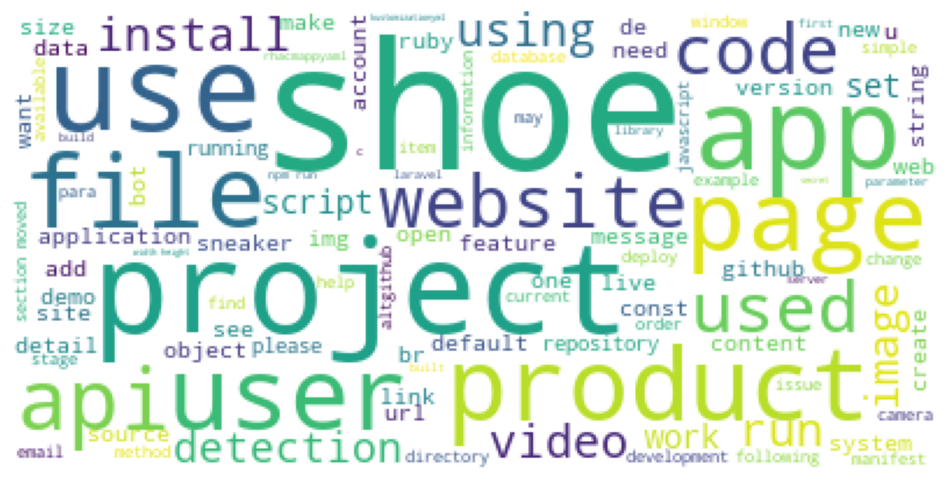

In [ ]:
word_cloud(all_words)

In [152]:
get_tfidf(all_words)


- - - - - - - - - - - - - - -
Key / value pairs of words and frequencies :
00                                    10.424753
00000                                 10.830218
000000000000                          10.424753
00000000000000000000000000000000      10.424753
0000443                               10.830218
                                        ...    
zprobe                                10.424753
zsh                                    9.913927
zshrc                                 10.424753
zustandhttpsgithubcompmndrszustand    10.830218
zzakhttpsgithubcomzacharyscott        10.830218
Length: 8635, dtype: float64

- - - - - - - - - - - - - - -
Dataframe of TF-IDF scores :


,00,00000,000000000000,00000000000000000000000000000000,0000443,000jpghttpsgithubcomspiralofhopeshoes_tutorial_walkthroughrawmasterimgs000jpg,001,00100,0015,001pnghttpsgithubcomashbbshoes_tutorial_walkthroughrawmasterimgs001png,...,zonecontrol,zoom,zoom1rb,zoomed,zoomrb,zprobe,zsh,zshrc,zustandhttpsgithubcompmndrszustand,zzakhttpsgithubcomzacharyscott
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
train, validate, test = split_train_test(df)

train.shape, validate.shape, test.shape

((91, 6), (55, 6), (37, 6))

In [154]:
X_train, y_train, X_validate, y_validate, X_test, y_test = xy_train(train, validate, test, 'language')

In [155]:
X_train

,repo,readme_contents,clean,stemmed,lemmatized
30,seuliufeng/DeepSBIR,# Sketch Me *That* Shoe\n\n\n###Introduction\n...,sketch shoe introduction repository contains c...,sketch shoe introduct repositori contain code ...,sketch shoe introduction repository contains c...
44,onyxblade/ShenmeGUI,什么鬼！\n======\n\n###概述\n\nShenmeGUI是一套受[Shoes](...,shenmeguishoeshttpshoesrbcomguidslhtmlgui gem ...,shenmeguishoeshttpshoesrbcomguidslhtmlgui gem ...,shenmeguishoeshttpshoesrbcomguidslhtmlgui gem ...
147,joseeestrada/jimmyjazzbot,# jimmyjazzbot\nQuick bot to purchase shoes fr...,jimmyjazzbot quick bot purchase shoes jimmy ja...,jimmyjazzbot quick bot purchas shoe jimmi jazz...,jimmyjazzbot quick bot purchase shoe jimmy jaz...
148,byprogrammers/LCRN05-nike-shoes-ecommerce-app,# LCRN05 - Nike Shoes Ecommerce App\n\n## [Wat...,lcrn05 nike shoes ecommerce app watch youtubeh...,lcrn05 nike shoe ecommerc app watch youtubehtt...,lcrn05 nike shoe ecommerce app watch youtubeht...
26,WebAR-rocks/WebAR.rocks.hand,# JavaScript/WebGL lightweight and robust hand...,javascriptwebgl lightweight robust hand tracki...,javascriptwebgl lightweight robust hand track ...,javascriptwebgl lightweight robust hand tracki...
...,...,...,...,...,...
111,paceaux/McSandy--the-HTML5-offline-Sandbox,# McSandy: The HTML5 offline Sandbox #\n\nA SF...,mcsandy html5 offline sandbox sfwa single file...,mcsandi html5 offlin sandbox sfwa singl file w...,mcsandy html5 offline sandbox sfwa single file...
14,Julian/vim-textobj-variable-segment,# vim-textobj-variable-segment\n\nA vim plugin...,vimtextobjvariablesegment vim plugin providing...,vimtextobjvariableseg vim plugin provid singl ...,vimtextobjvariablesegment vim plugin providing...
97,Klerith/shoesapp,# Shoesapp\n\nEste es el diseño que hacemos en...,shoesapp este es el diseno que hacemos en esta...,shoesapp est es el diseno que hacemo en esta a...,shoesapp este e el diseno que hacemos en esta ...
194,kaushiksheel/ShoesStore-Frontend-Typescript,# Shoe Store Ecommerce Application\n\n## Intro...,shoe store ecommerce application introduction ...,shoe store ecommerc applic introduct ecommerc ...,shoe store ecommerce application introduction ...


In [156]:
df['language'].value_counts()

other         46
ruby          41
javascript    41
python        25
dart          17
html          13
Name: language, dtype: int64

In [157]:
df['baseline'] = df['language'].value_counts().idxmax()

In [158]:
(df['language'] == df['baseline']).mean()

0.25136612021857924

In [204]:
# creating and transforming x train with the lemmatized data on a random forest model
X_bow = cv.fit_transform(X_train['stemmed'])
tree = RandomForestClassifier(max_depth=6, 
                            min_samples_leaf=3,
                            n_estimators=100, 
                            random_state=42, )

# fitting the data and getting the accuracy score 
tree.fit(X_bow, y_train)
tree.score(X_bow, y_train)

0.7142857142857143

In [205]:
# transforming and getting the validate accuracy on the model
X_val_bow = cv.transform(X_validate['stemmed'])
tree.score(X_val_bow, y_validate)

0.32727272727272727

In [259]:
def random_forest(X_train, y_train, X_validate, y_validate):
    results = []
    # creating and transforming x train with the lemmatized data on a random forest model
    X_bow = cv.fit_transform(X_train)
    tree = RandomForestClassifier(max_depth=6, 
                            min_samples_leaf=3,
                            n_estimators=100, 
                            random_state=42, )

    # fitting the data and getting the accuracy score 
    tree.fit(X_bow, y_train)
    train = tree.score(X_bow, y_train)
    results.append(train)
    
    # transforming and getting the validate accuracy on the model
    X_val_bow = cv.transform(X_validate)
    validate = tree.score(X_val_bow, y_validate)
    results.append(validate)
    
    print(f'Train Accuracy:    {train:.4}')
    print(f'Validate Accuracy: {validate:.4}')
    

In [260]:
random_forest(X_train['stemmed'], y_train, X_validate['stemmed'], y_validate)

Train accuracy:    0.7143
Validate accuracy: 0.3273


In [261]:
random_forest(X_train['lemmatized'], y_train, X_validate['lemmatized'], y_validate)

Train accuracy:    0.6923
Validate accuracy: 0.2364


In [213]:
# creating and transforming the x train lemmatized data on a decision tree
cv = CountVectorizer()
X_bow = cv.fit_transform(X_train['stemmed'])
dctree = DecisionTreeClassifier(max_depth=3, 
                                random_state=42)

# fitting the data and getting the accuracy score
dctree.fit(X_bow, y_train)
dctree.score(X_bow, y_train)

0.5714285714285714

In [214]:
# transforming and getting the validate accuracy on the model
X_val_bow = cv.transform(X_validate['stemmed'])
dctree.score(X_val_bow, y_validate)

0.43636363636363634

In [215]:
X_test_bow = cv.transform(test['stemmed'])
dctree.score(X_test_bow, y_test)

0.43243243243243246

In [264]:
def dec_tree(X_train, y_train, X_validate, y_validate):
    results = []
    # creating and transforming x train with the lemmatized data on a random forest model
    X_bow = cv.fit_transform(X_train)
    dec = DecisionTreeClassifier(max_depth=3, random_state=42)

    # fitting the data and getting the accuracy score 
    dec.fit(X_bow, y_train)
    train = dec.score(X_bow, y_train)
    results.append(train)
    
    # transforming and getting the validate accuracy on the model
    X_val_bow = cv.transform(X_validate)
    validate = dec.score(X_val_bow, y_validate)
    results.append(validate)
    
    print(f'Train Accuracy:    {train:.4}')
    print(f'Validate Accuracy: {validate:.4}')

In [265]:
dec_tree(X_train['stemmed'], y_train, X_validate['stemmed'], y_validate)

Train accuracy:    0.5714
Validate accuracy: 0.4364


In [266]:
dec_tree(X_train['lemmatized'], y_train, X_validate['lemmatized'], y_validate)

Train accuracy:    0.5714
Validate accuracy: 0.4909


In [235]:
cv = CountVectorizer()
X_bow = cv.fit_transform(X_train['lemmatized'])
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# fitting the data and getting the accuracy score 
knn.fit(X_bow, y_train)
knn.score(X_bow, y_train)

/Users/shawnbrown/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.4945054945054945

In [236]:
X_val_bow = cv.transform(X_validate['lemmatized'])
knn.score(X_val_bow, y_validate)

/Users/shawnbrown/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.2909090909090909

In [256]:
def knn(X_train, y_train, X_validate, y_validate):
    results = []
    # creating and transforming x train with the lemmatized data on a random forest model
    X_bow = cv.fit_transform(X_train)
    knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

    # fitting the data and getting the accuracy score 
    knn.fit(X_bow, y_train)
    train = knn.score(X_bow, y_train)
    results.append(train)
    
    # transforming and getting the validate accuracy on the model
    X_val_bow = cv.transform(X_validate)
    validate = knn.score(X_val_bow, y_validate)
    results.append(validate)
    
    print(f'Train Accuracy:    {train:.4}')
    print(f'Validate Accuracy: {validate:.4}')

In [258]:
knn(X_train['lemmatized'], y_train, X_validate['lemmatized'], y_validate)

Train accuracy:    0.4945
Validate accuracy: 0.2909


/Users/shawnbrown/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/shawnbrown/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

In [267]:
knn(X_train['stemmed'], y_train, X_validate['stemmed'], y_validate)

Train accuracy:    0.4615
Validate accuracy: 0.2364


/Users/shawnbrown/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/shawnbrown/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

In [273]:
def dec_test_accuracy(X_train, y_train, X_validate, y_validate, X_test, y_test):
    
    results = []
    # creating and transforming x train with the lemmatized data on a random forest model
    X_bow = cv.fit_transform(X_train)
    dec = DecisionTreeClassifier(max_depth=3, random_state=42)

    # fitting the data and getting the accuracy score 
    dec.fit(X_bow, y_train)
    train = dec.score(X_bow, y_train)
    results.append(train)
    
    # transforming and getting the validate accuracy on the model
    X_val_bow = cv.transform(X_validate)
    validate = dec.score(X_val_bow, y_validate)
    results.append(validate)
    
    X_val_bow = cv.transform(X_test)
    test = dec.score(X_val_bow, y_test)
    results.append(test)
    
    print(f'Train Accuracy:    {train:.4}')
    print(f'Validate Accuracy: {validate:.4}')
    print(f'Test Accuracy:     {test:.4}')

In [272]:
test_accuracy(X_train['stemmed'], y_train, X_validate['stemmed'], y_validate, X_test['stemmed'], y_test)

Train Accuracy:    0.5714
Validate Accuracy: 0.4364
Test Accuracy:     0.4324


```python
def random_forest(X_train, y_train, X_validate, y_validate, X_test, y_test, max_depth, n_estimators):
    results = []
    for md in max_depth:
            for n in n_estimators:
                
                cv = CountVectorizer()
                X_bow = cv.fit_transform(X_train)
                rf = RandomForestClassifier(max_depth=md, min_leaf_samples=3, n_estimators=n, random_state=seed)
                rf.fit(X_bow, y_train)
                # Accuracy and recall for the training data  
                y_train_pred = rf.predict(X_train)
                train_accuracy = accuracy_score(y_train, y_train_pred)
                train_recall = recall_score(y_train, y_train_pred)
                # Accuracy and recall for the validate data
                y_validate_pred = rf.predict(X_validate)
                validate_accuracy = accuracy_score(y_validate, y_validate_pred)
                validate_recall = recall_score(y_validate, y_validate_pred)
                # Accuracy and recall for the test data
                #y_test_pred = clf_xgb.predict(X_test)
                #test_accuracy = accuracy_score(y_test, y_test_pred)
                #test_recall = recall_score(y_test, y_test_pred)
                
                # Append results to the list
                results.append({'max_depth': md,
                                'n_estimators': n_estimators,
                                'Train Accuracy': train_accuracy,
                                'Train Recall': train_recall,
                                'Validate Accuracy': validate_accuracy,
                                'Validate Recall': validate_recall
                                })
                
                                #'Test Accuracy': test_accuracy,
                                #'Test Recall': test_recall
                # Print results
                #print(f"max_depth: {md}, scale_pos_weight: {sw}, learning_rate: {lr}, Train Recall: {train_recall:.4f}, Validate Recall: {validate_recall:.4f}, Test Recall: {test_recall:.4f}")
    # Convert results list to DataFrame and return
    results_df = pd.DataFrame(results)
    return results_df
```